In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
import pickle

In [2]:
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')

# Data Understanding

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1030,ham,Can not use foreign stamps in this country. Go...,NaN,NaN,NaN
4717,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
1177,ham,Just nw i came to hme da..,NaN,NaN,NaN
483,ham,Thank you baby! I cant wait to taste the real ...,NaN,NaN,NaN
3338,ham,Babe !!!! I LOVE YOU !!!! *covers your face in...,NaN,NaN,NaN
4020,ham,We have to pick rayan macleran there.,NaN,NaN,NaN
1877,ham,This pen thing is beyond a joke. Wont a Biro d...,NaN,NaN,NaN
2801,ham,And smile for me right now as you go and the w...,NaN,NaN,NaN
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN,NaN,NaN
5538,ham,I can't believe how attached I am to seeing yo...,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.duplicated().sum()

403

# Data Cleaning

In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [10]:
data.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [11]:
le = LabelEncoder()
data["target"] = le.fit_transform(data["target"])

In [12]:
# 0 => ham
# 1 => spam
data.sample(5)

,target,text
5077,1,Do you want a New Nokia 3510i colour phone Del...
4218,0,Anything lor if they all go then i go lor...
2384,0,"Sorry, I'll call later"
3106,0,Hi. Happy New Year. I dont mean to intrude but...
3545,0,SO IS TH GOWER MATE WHICH IS WHERE I AM!?! HOW...


In [13]:
data.isnull().mean()*100

target    0.0
text      0.0
dtype: float64

In [14]:
data = data.drop_duplicates(keep="first")

In [15]:
data.shape

(5169, 2)

# Exploratory Data Analysis

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

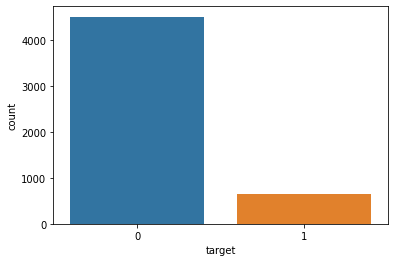

In [18]:
sns.countplot(data["target"])

<AxesSubplot:ylabel='target'>

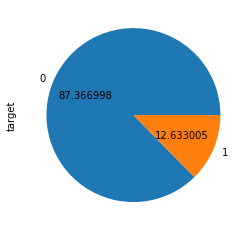

In [19]:
data["target"].value_counts().plot(kind="pie", autopct="%2f")

In [20]:
# nltk.download('punkt')

In [21]:
# Number of Characters in a line of Text
data["number_of_char"] = data["text"].apply(len)

In [22]:
data["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
# Number of Words in a line of Text 
data["number_of_words"] = data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data["text"].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [25]:
# Number of Words in a line of Text 
data["number_of_sentences"] = data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,target,text,number_of_char,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   target               5169 non-null   int32 
 1   text                 5169 non-null   object
 2   number_of_char       5169 non-null   int64 
 3   number_of_words      5169 non-null   int64 
 4   number_of_sentences  5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [28]:
data.describe()

,target,number_of_char,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [29]:
data[data["target"]==1].describe()

,target,number_of_char,number_of_words,number_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [30]:
data[data["target"]==0].describe()

,target,number_of_char,number_of_words,number_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


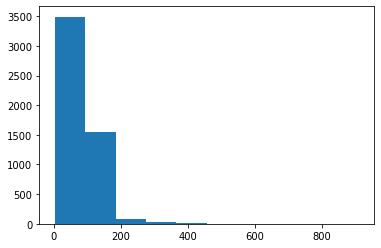

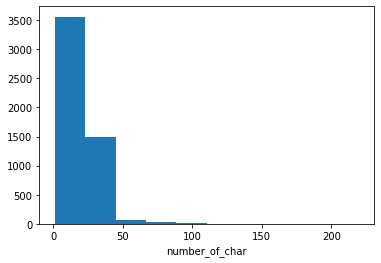

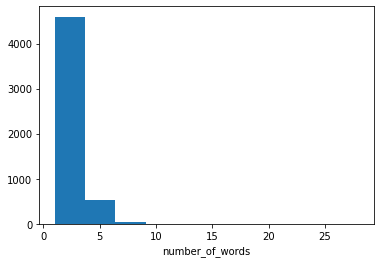

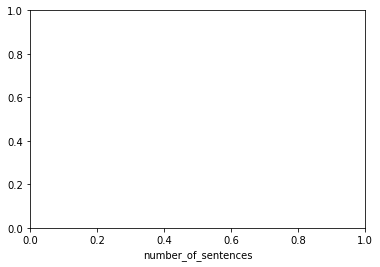

In [31]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


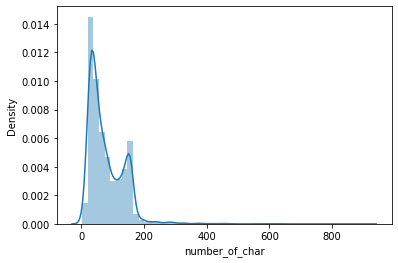

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


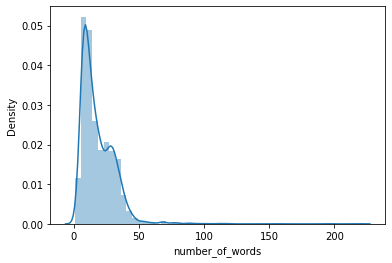

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


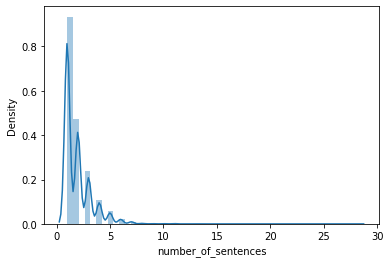

In [32]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


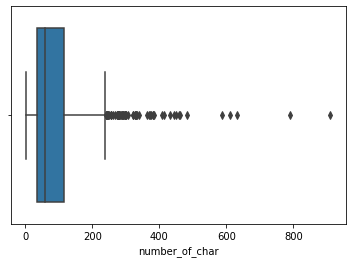

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


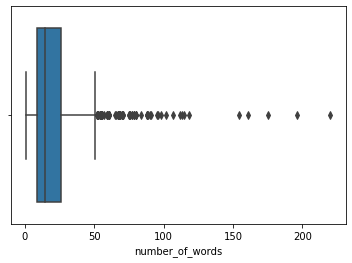

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


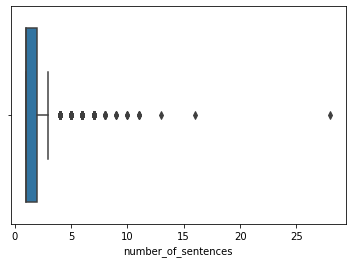

In [33]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


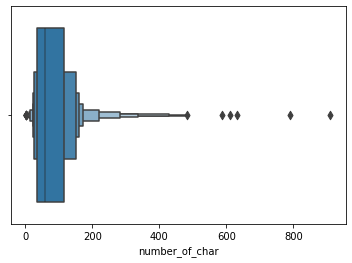

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


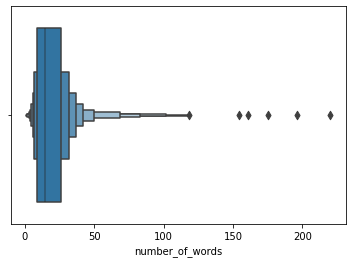

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


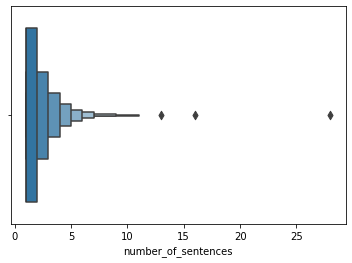

In [34]:
# BoxenPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

<AxesSubplot:xlabel='number_of_char', ylabel='Count'>

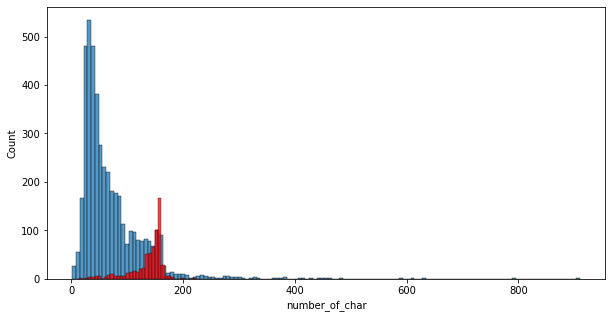

In [35]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['target'] == 0]['number_of_char'])
sns.histplot(data[data['target'] == 1]['number_of_char'],color='red')

<AxesSubplot:xlabel='number_of_words', ylabel='Count'>

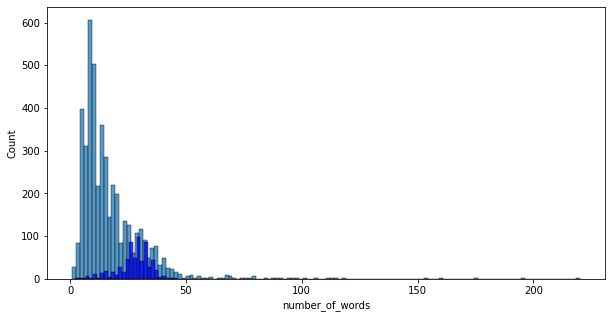

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['target'] == 0]['number_of_words'])
sns.histplot(data[data['target'] == 1]['number_of_words'],color='blue')

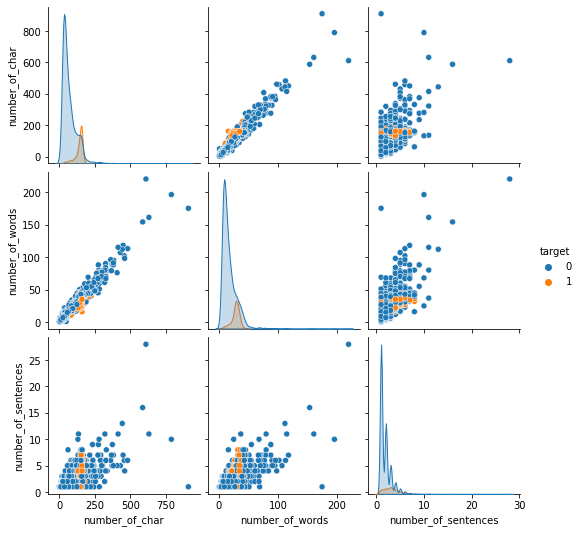

In [37]:
sns.pairplot(data, hue="target")

In [38]:
data.corr()

,target,number_of_char,number_of_words,number_of_sentences
target,1.000000,0.384717,0.262984,0.284901
number_of_char,0.384717,1.000000,0.965770,0.638143
number_of_words,0.262984,0.965770,1.000000,0.684541
number_of_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

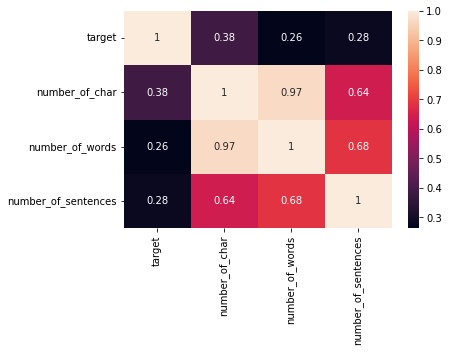

In [39]:
sns.heatmap(data.corr(), annot=True)

After the HeatMap Obervation there is a high corelation between the columns so, only number_of_char is taken into consideration as it has high corelation among others.

# Text Preprocessing

In [40]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
ps = PorterStemmer()
ps.stem("loving")

'love'

In [42]:
# Converting Text to lowercase, removing Special Characters, removing Stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [43]:
transform_text("hello! I am Mohit.?")

'hello mohit'

In [44]:
transform_text(data['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
data["transformed_text"] = data["text"].apply(transform_text)

In [46]:
data.head()

,target,text,number_of_char,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


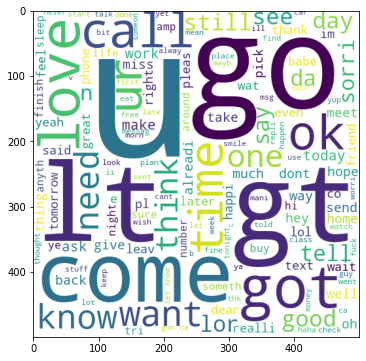

In [48]:
# WordCloud for ham Messages

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

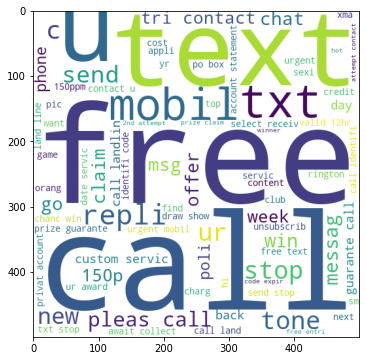

In [50]:
# WordCloud for Spam Messages

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
data[data['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [52]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


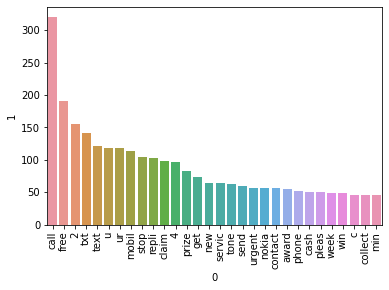

In [54]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


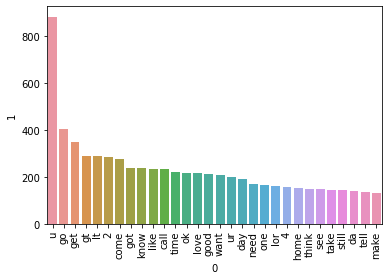

In [56]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
data.head()

,target,text,number_of_char,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [58]:
cv = CountVectorizer()
tfd = TfidfVectorizer(max_features=3000)

In [59]:
x = tfd.fit_transform(data["transformed_text"]).toarray()
y = data["target"].values

In [60]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# x = np.hstack((x, data['num_of_char'].values.reshape(-1,1)))

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [63]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred)*100)

86.94390715667312
[[788 108]
 [ 27 111]]
50.68493150684932


In [64]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [65]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred = bnb.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


**TFIDF** method is more Effecient in terms of accuracy and precision than Bag Of Words


In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
def model_training(model):
    model.fit(x_train, y_train) 
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    
    return accuracy, precision

In [68]:
model_training(xgb)

(0.971953578336557, 0.943089430894309)

In [69]:
models = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    
    current_accuracy, current_precision = model_training(model)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision*100)
    print("====================================")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  97.58220502901354
Precision -  97.47899159663865
For  KN
Accuracy -  90.52224371373308
Precision -  100.0
For  NB
Accuracy -  97.09864603481626
Precision -  100.0
For  DT
Accuracy -  92.94003868471954
Precision -  82.82828282828282
For  LR
Accuracy -  95.84139264990328
Precision -  97.02970297029702
For  RF
Accuracy -  97.48549323017409
Precision -  98.27586206896551
For  AdaBoost
Accuracy -  96.0348162475822
Precision -  92.92035398230088
For  BgC
Accuracy -  95.74468085106383
Precision -  86.71875
For  ETC
Accuracy -  97.48549323017409
Precision -  97.45762711864407
For  GBDT
Accuracy -  94.77756286266924
Precision -  92.0
For  xgb
Accuracy -  97.1953578336557
Precision -  94.3089430894309


In [71]:
model_performance = pd.DataFrame({'Models/Algorithms':models.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)
model_performance

,Models/Algorithms,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [72]:
# Voting Classifier 
# Selecting the three Classifiers which are better in case of Accuracy and Precision
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(x_train, y_train)
pred = voting.predict(x_test)

print("Accuracy",accuracy_score(y_test, pred)*100)
print("Precision",precision_score(y_test, pred)*100)

Accuracy 98.16247582205028
Precision 99.17355371900827


In [73]:
# Applying stacking
# Selecting the three Classifiers which are better in case of Accuracy and Precision and Considering Final Estimator as RandomForestClassifier 

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
stc = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stc.fit(x_train, y_train)
pred = stc.predict(x_test)

print("Accuracy",accuracy_score(y_test, pred)*100)
print("Precision",precision_score(y_test, pred)*100)

Accuracy 97.77562862669245
Precision 92.5925925925926


After Observing All details, **Multinomial Naive Bayes** is the one which is considered as the Final model For Classification of Spam Message as it has moderate Accuracy than others and Excellent Precision of 100%

In [74]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test)
print(accuracy_score(y_test, pred)*100)
# print(confusion_matrix(y_test, pred))
print(precision_score(y_test, pred)*100)

97.09864603481626
100.0


In [78]:
# confusion_matrix = confusion_matrix(y_test, pred)

# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["ham", "spam"])

# cm_display.plot()
# plt.show()

In [79]:
pickle.dump(tfd,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))